### Universidad del Valle de Guatemala
#### Brandon Ronaldo Sicay Cumes - 21757
##### Laboratorio 3


Chat utilizado https://chatgpt.com/c/679043bd-6990-800f-8b61-e48f1ddf164c

## **Parte 1: Rompiendo ECB en Imágenes**

(código en archivo encrypt_image.py)

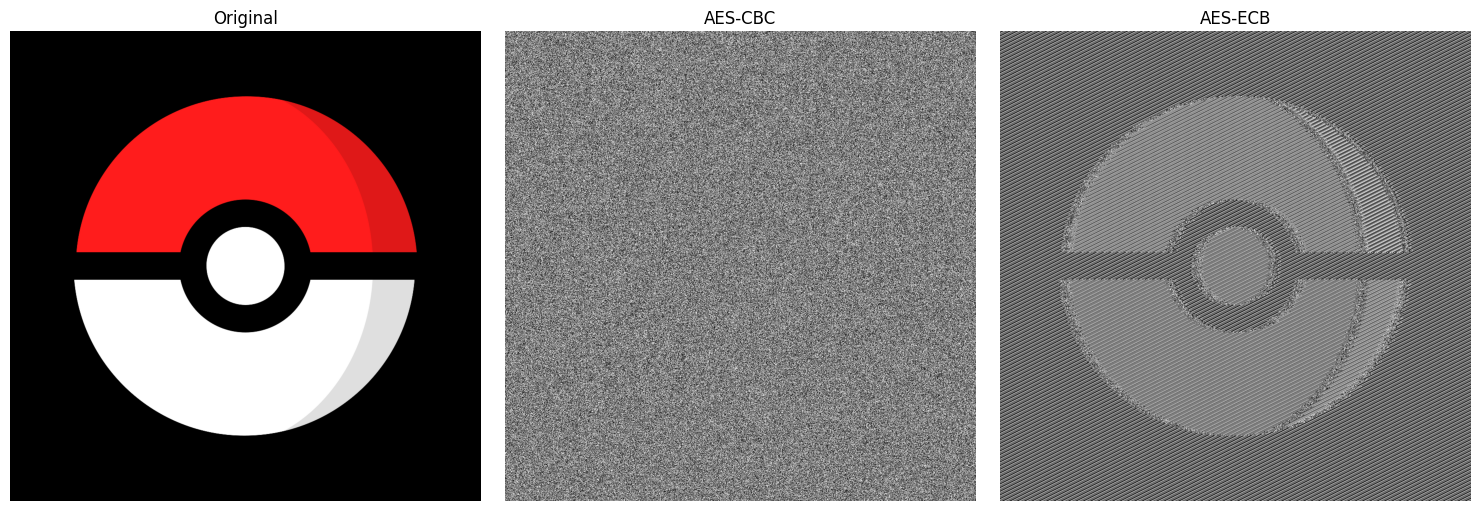

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

# ---------- rutas ----------
orig_path = "./parte1/example.bmp"
cbc_path  = "./parte1/example_encrypted_cbc.png"
ecb_path  = "./parte1/example_encrypted_ecb.png"

# ---------- cargar imágenes ----------
orig_img = Image.open(orig_path).convert("RGB")
cbc_img  = Image.open(cbc_path).convert("RGB")
ecb_img  = Image.open(ecb_path).convert("RGB")

# ---------- mostrar ----------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(orig_img)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(cbc_img)
axs[1].set_title("AES-CBC")
axs[1].axis("off")

axs[2].imshow(ecb_img)
axs[2].set_title("AES-ECB")
axs[2].axis("off")

plt.tight_layout()
plt.show()



### • ¿Por qué el cifrado **ECB** deja ver los patrones de la imagen?
- En ECB cada bloque de 16 bytes se cifra **por separado** y **siempre igual**.  
- Si dos bloques de la imagen contienen los mismos píxeles en gris, su bloque cifrado también es idéntico.  
- Cuando el visor vuelve a colocar esos bytes en su posición, los bloques repetidos forman contornos y figuras que delatan la imagen original.


### • ¿Cómo cambia la apariencia con **CBC**?
- CBC mezcla cada bloque con el bloque cifrado anterior (el primero se mezcla con un IV aleatorio).  
- Eso significa que, aunque dos bloques de píxeles sean idénticos, su versión cifrada será **distinta**.  
- El resultado se ve como “ruido”: no hay contornos ni patrones reconocibles de la foto original.


### • ¿Es seguro usar **ECB** para datos estructurados?
| Contras de ECB | Resultado |
|------------------|-----------|
| Bloques iguales ⇒ ciphertext igual | Filtra patrones (imágenes, formularios, campos repetidos). |
| Sin “aleatoriedad” entre bloques | Permite copiar/pegar bloques para alterar el mensaje. |
| Fácil analizar frecuencia | Un atacante puede deducir contenido repetido o plantillas. |

En resumen, **ECB no es recomendable** para archivos, bases de datos, imágenes ni texto: revela demasiada información.  
Para protección real usa modos encadenados o autenticados (CBC con IV aleatorio, CTR, GCM, ChaCha20-Poly1305, etc.).


## **Parte 2: Capturando Cifrado en Red con Wireshark**

(código en archivos de carpeta parte2)

### Cliente: 

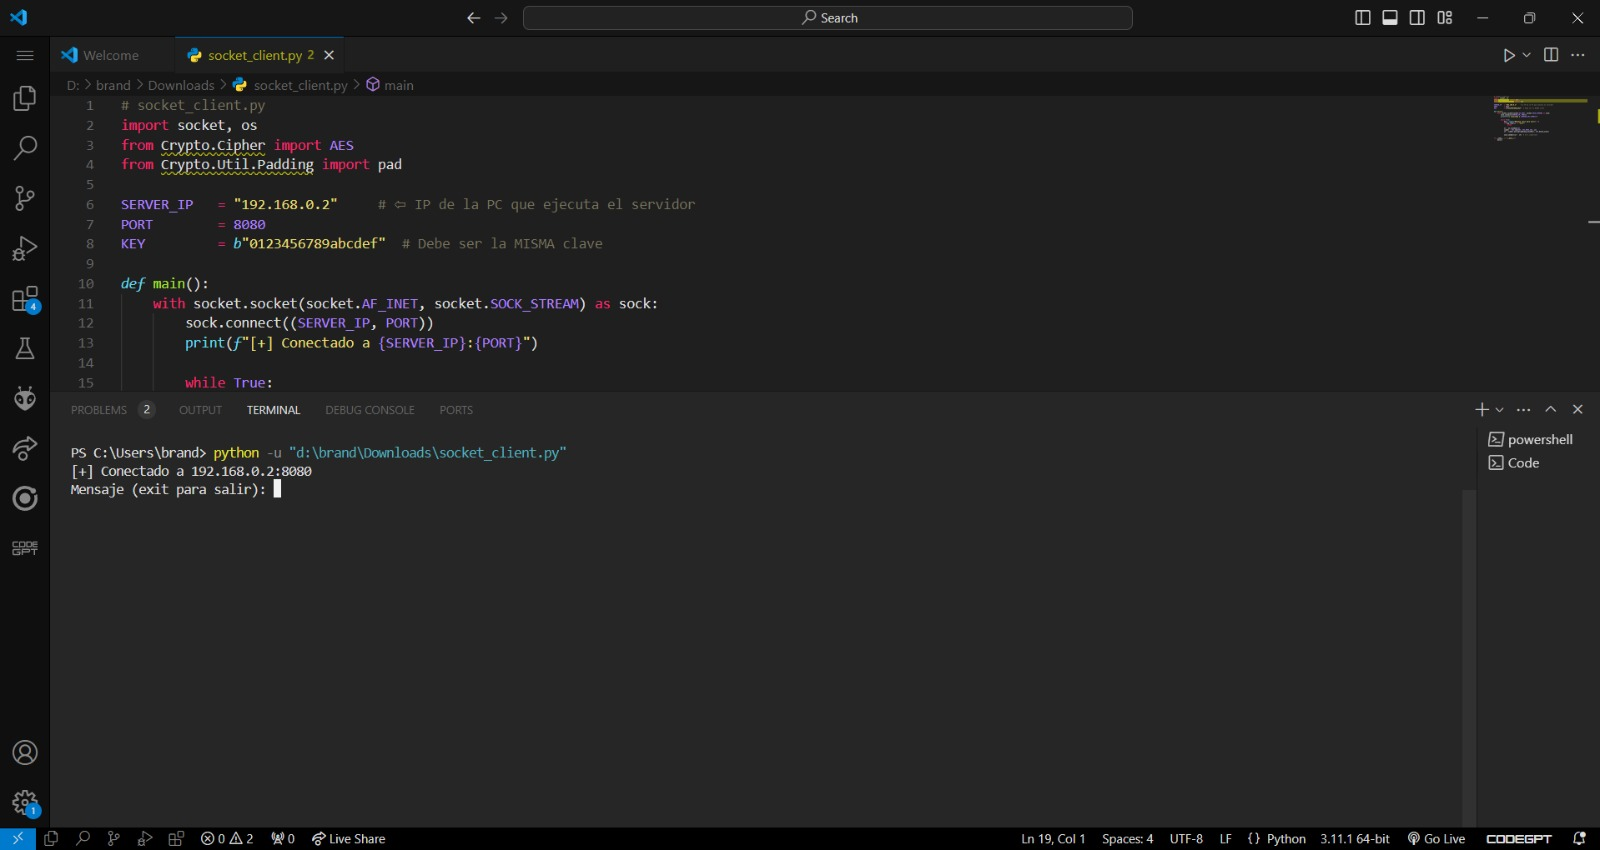


### Server: 


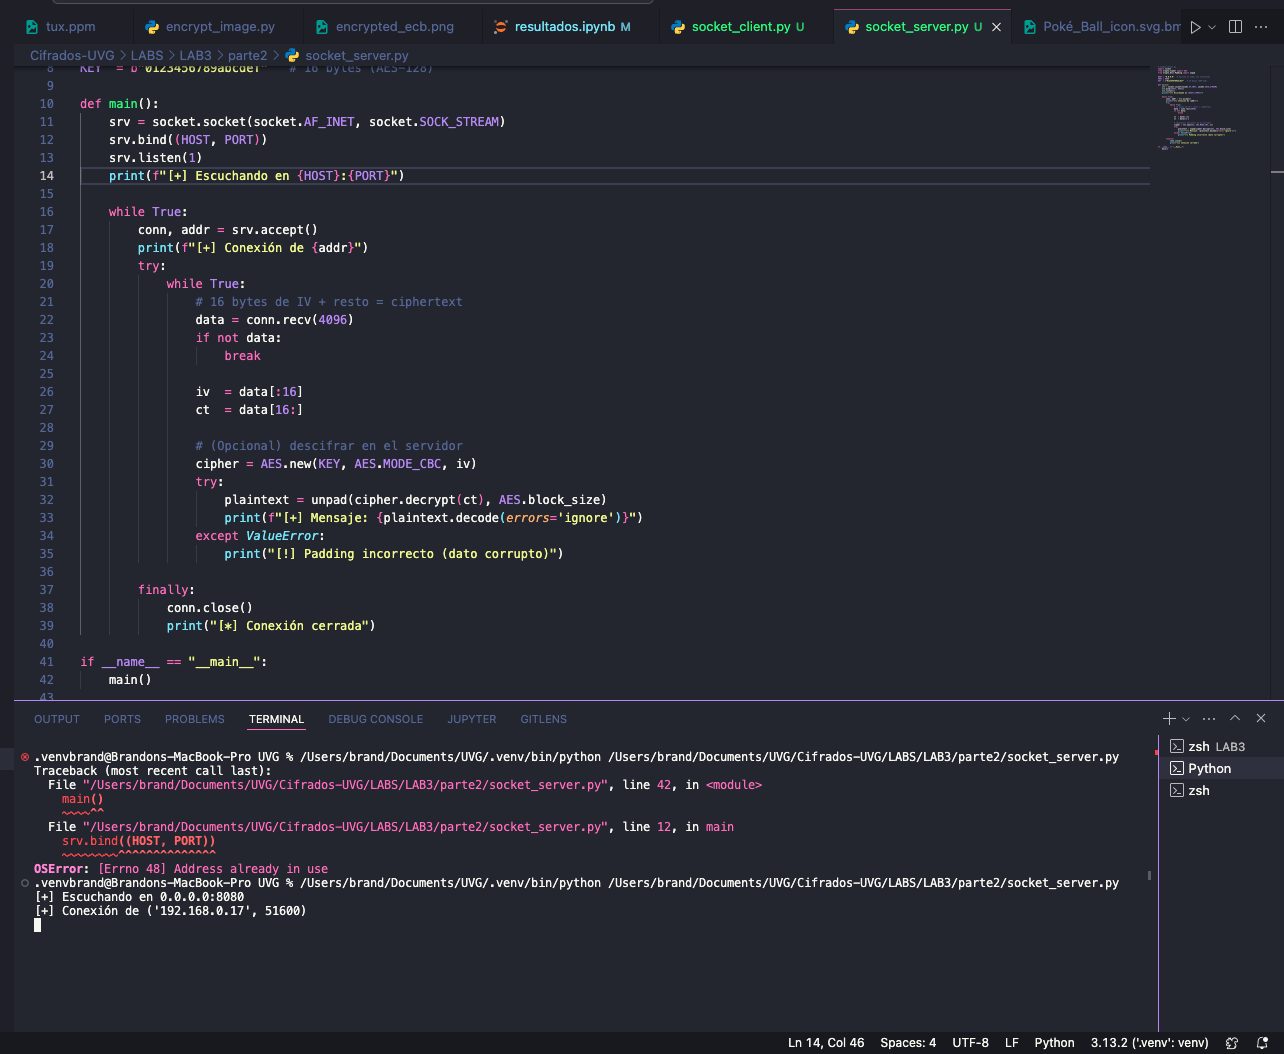

### Conexión en wireshark: 

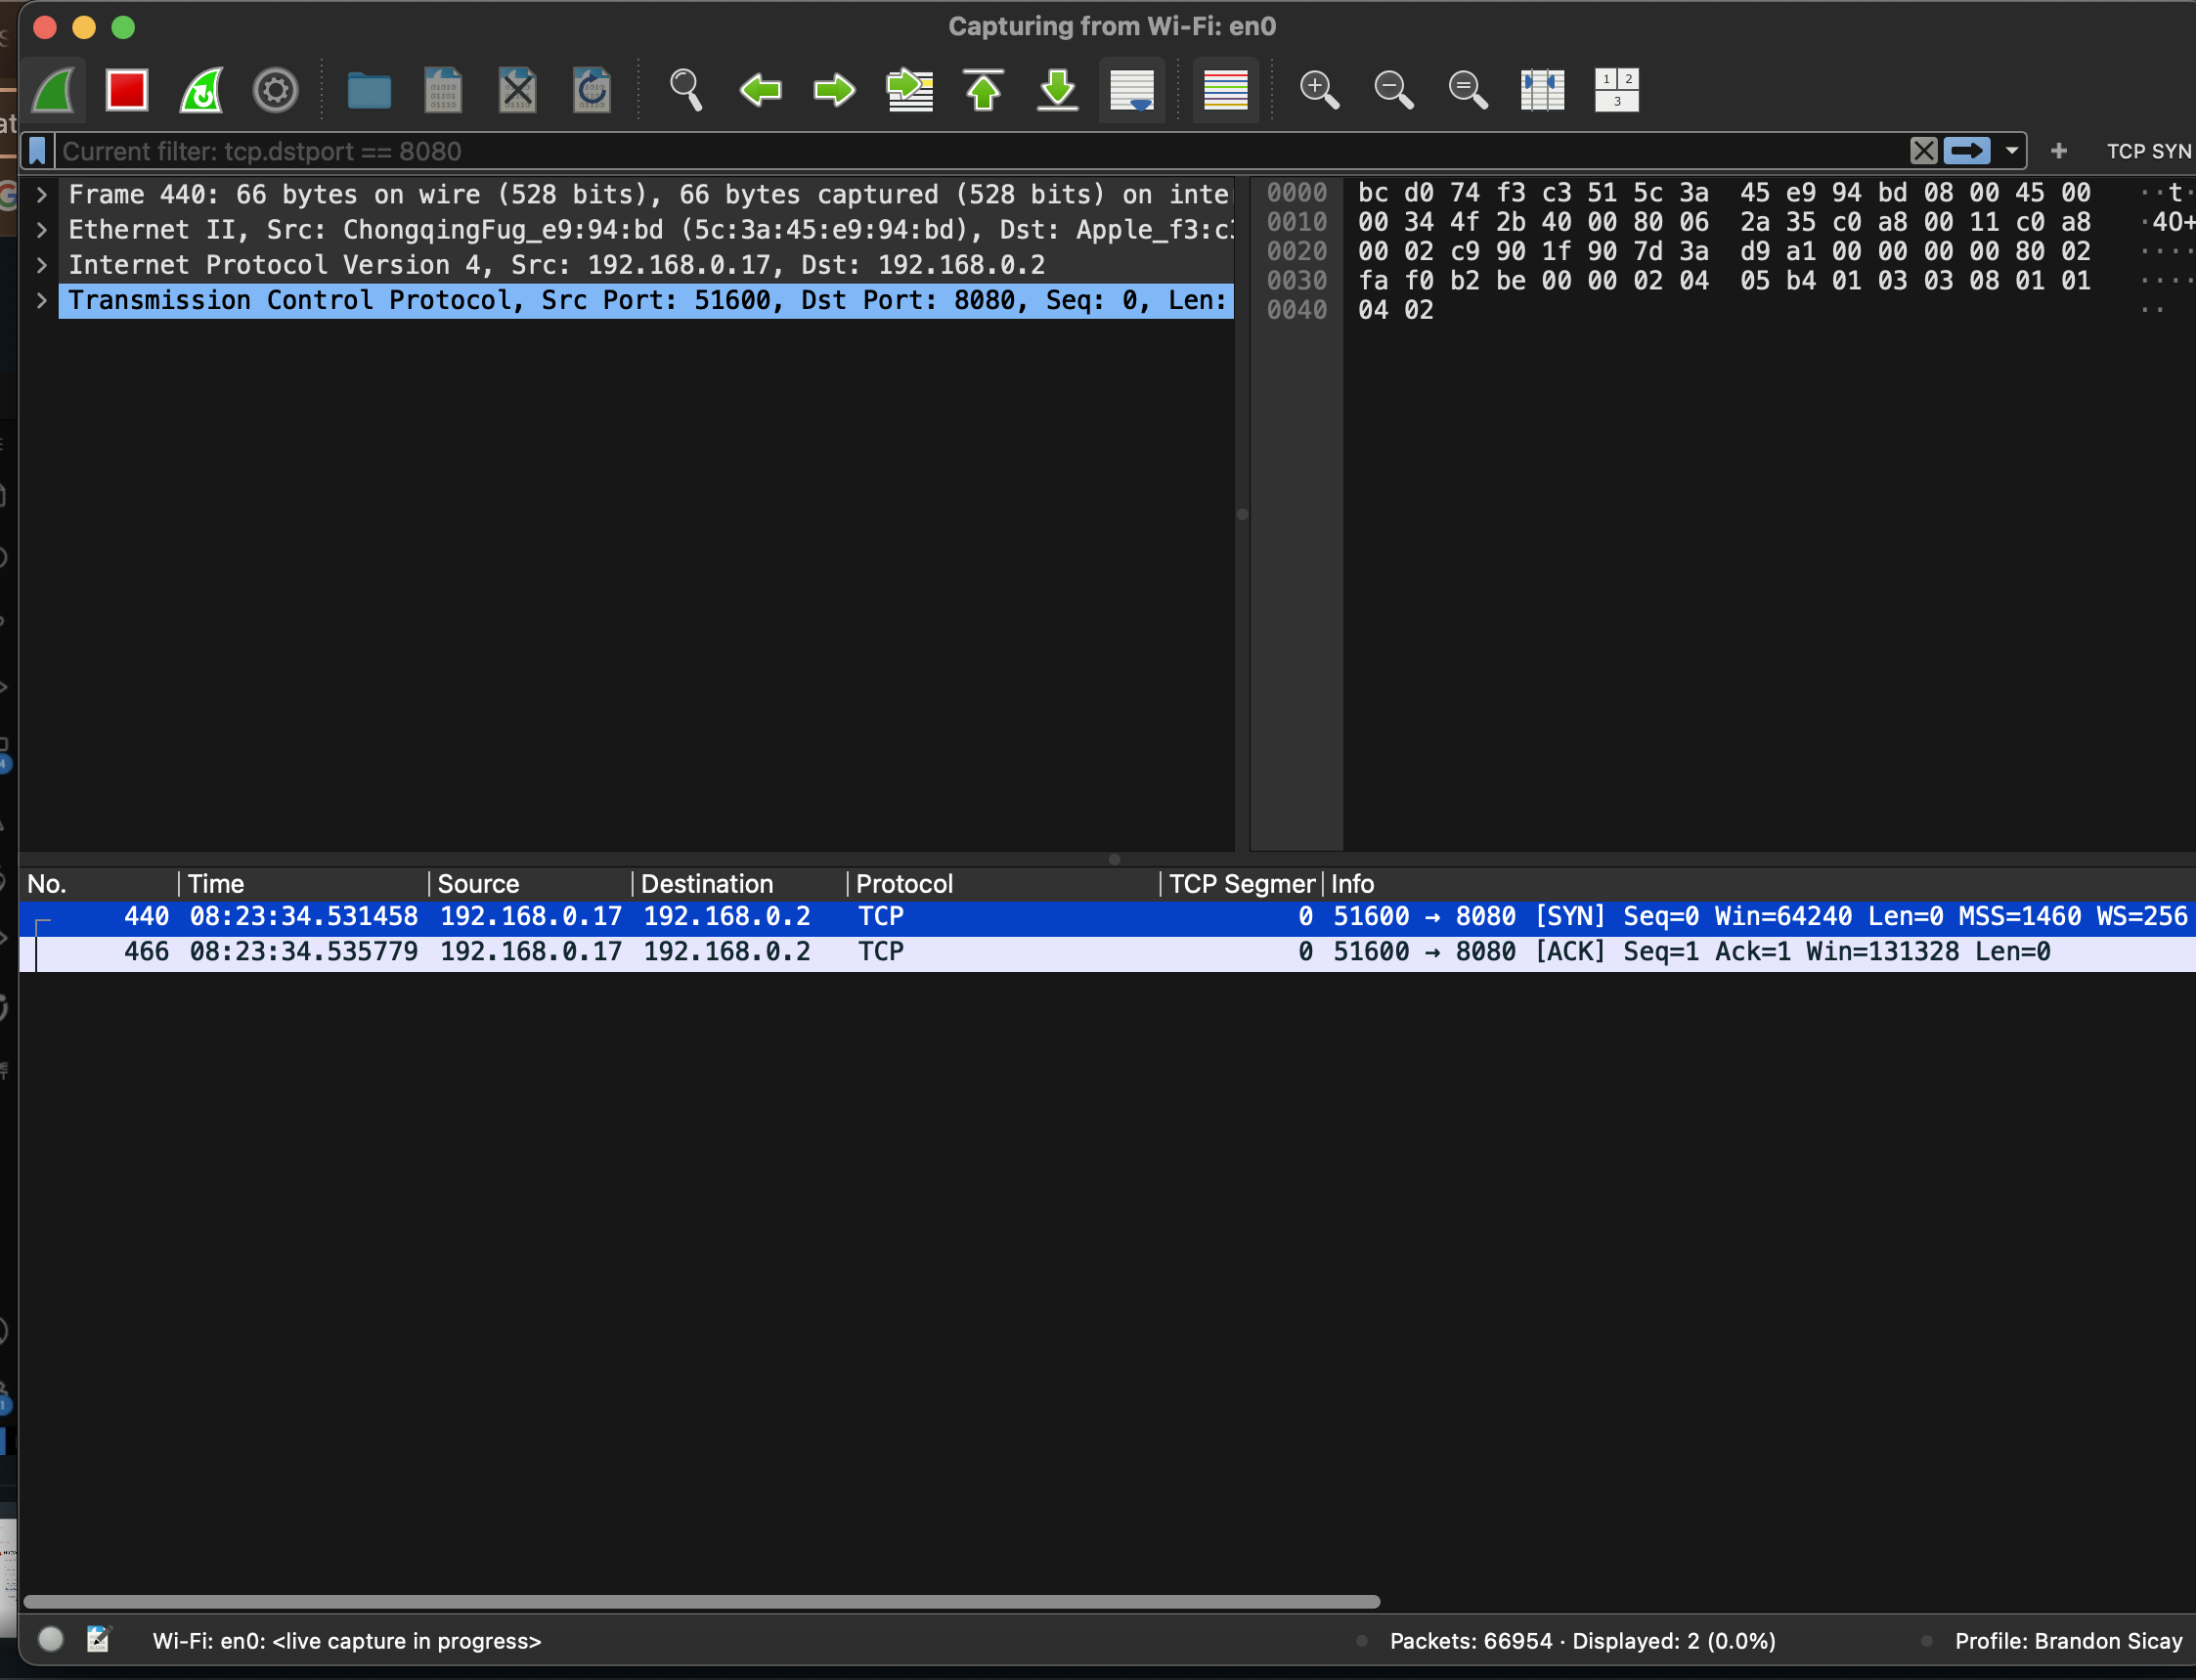


### Mensaje enviado: 

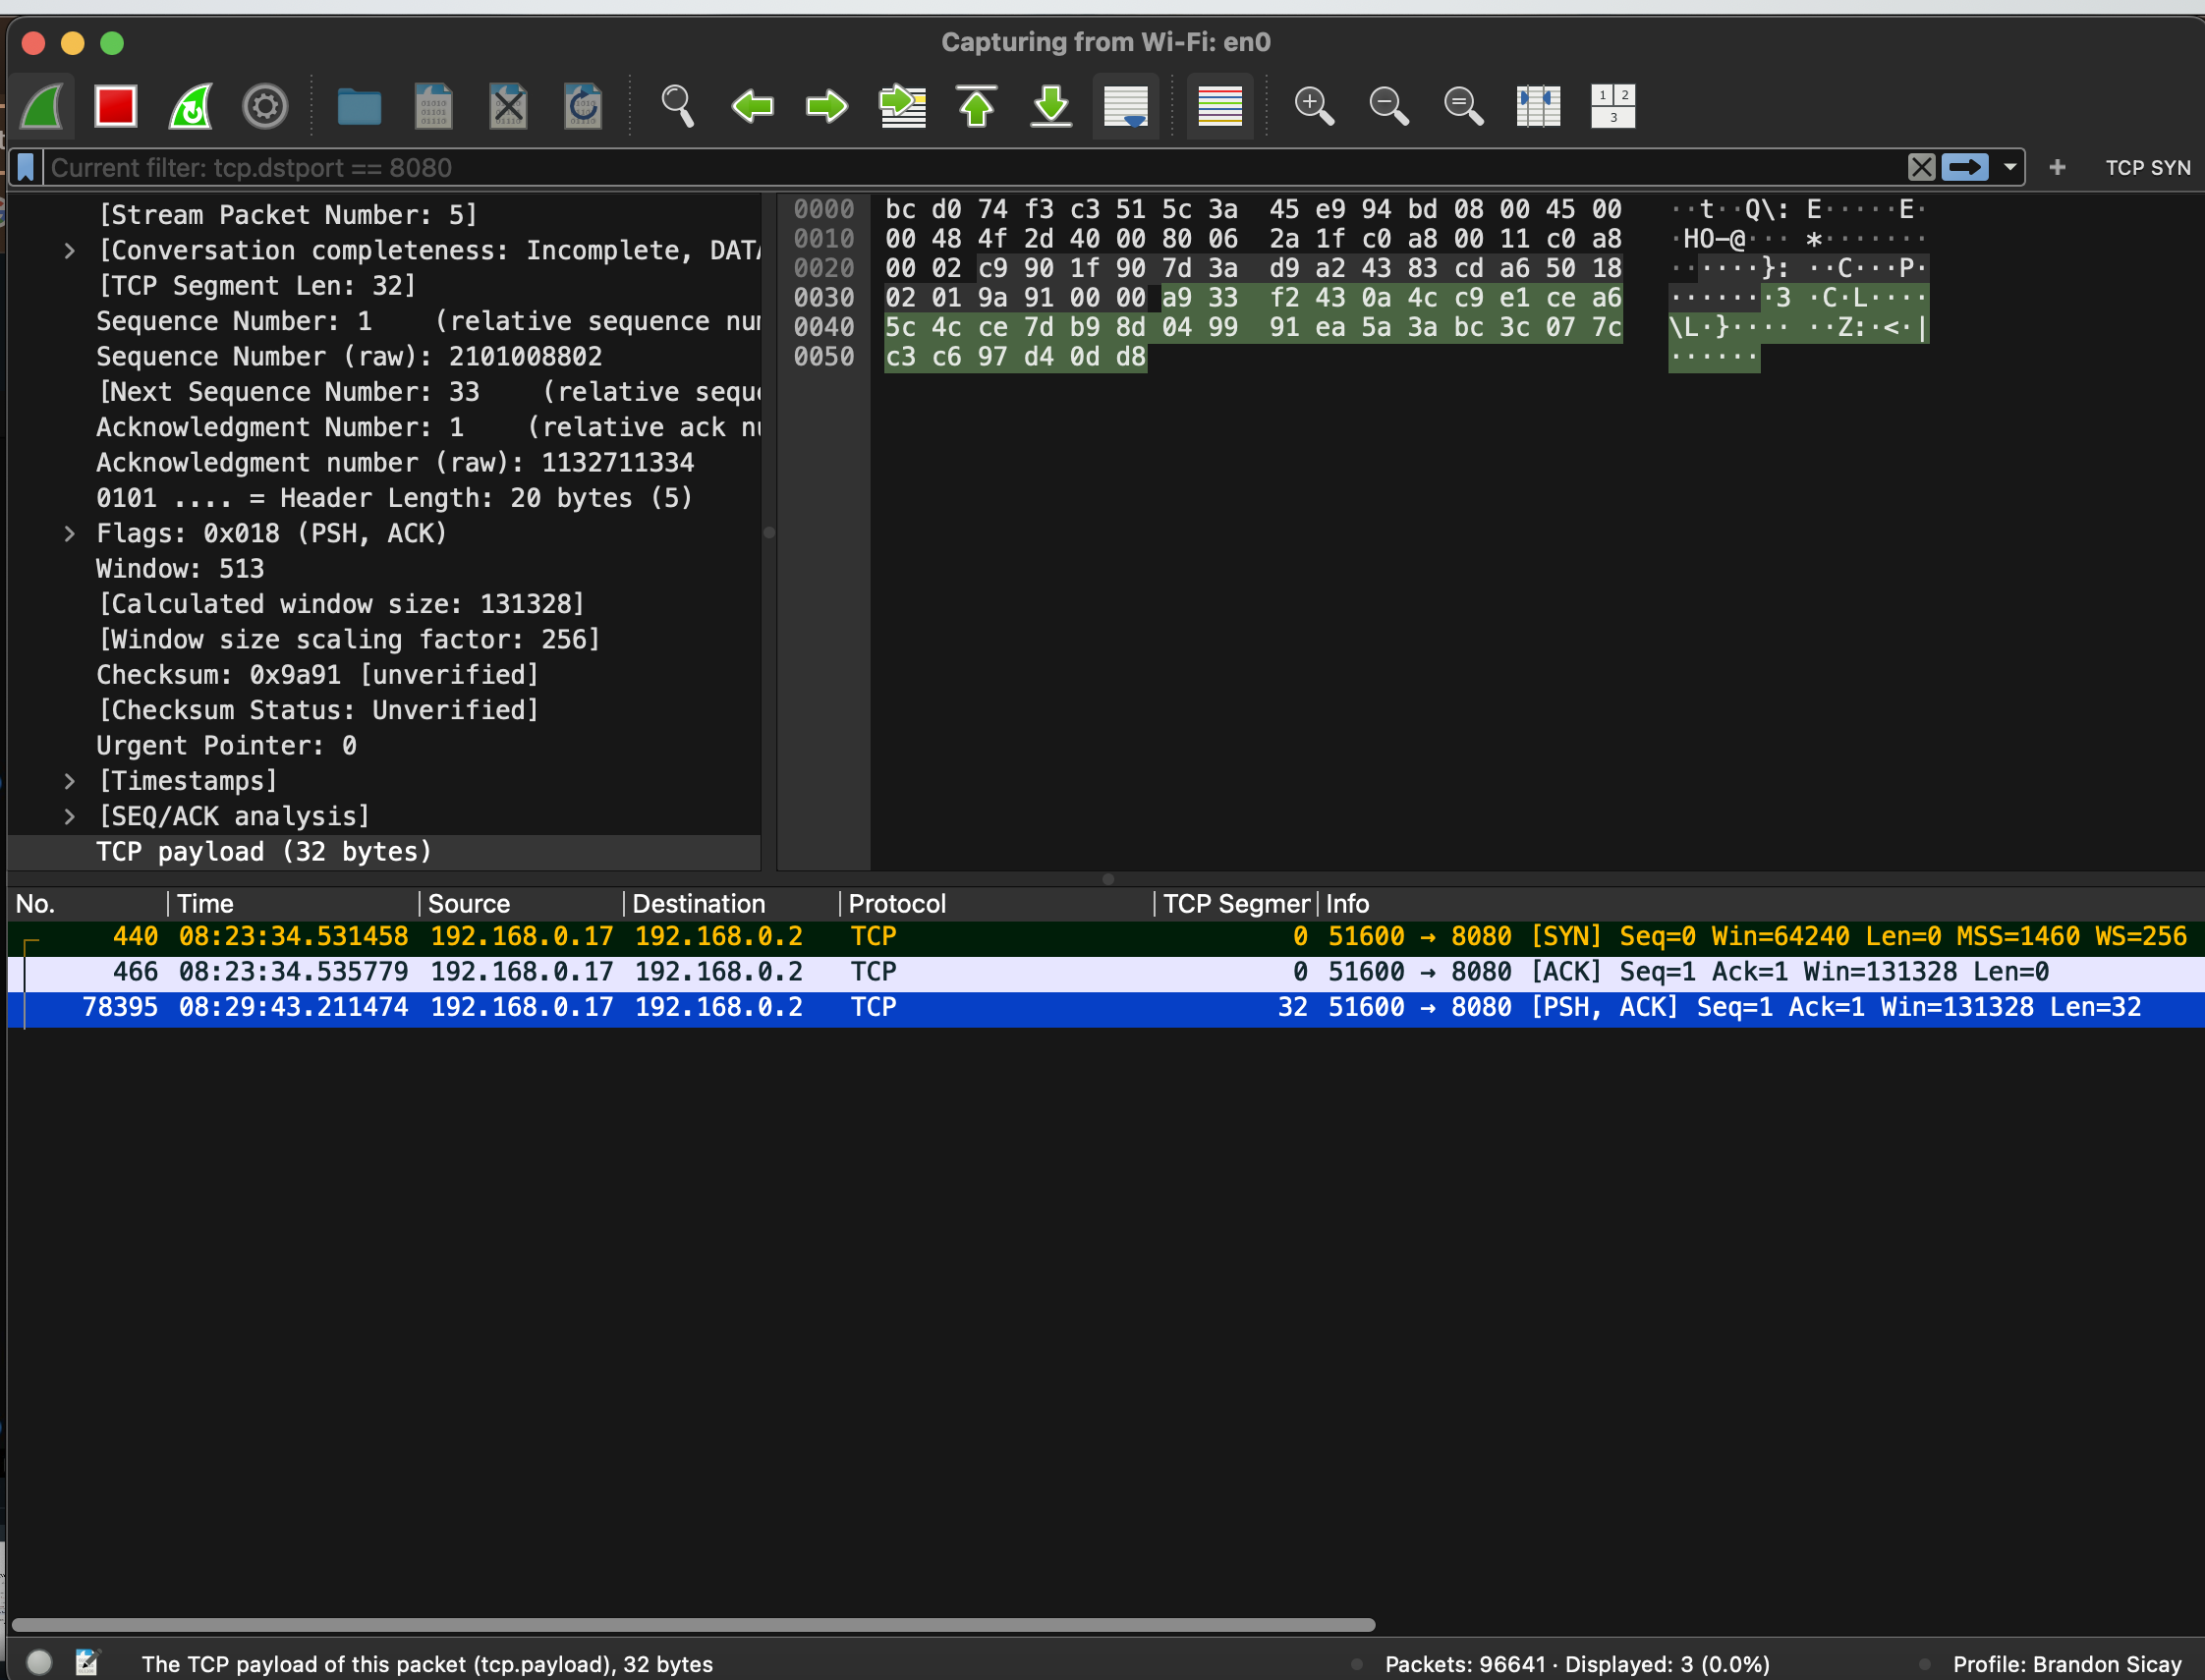

### • ¿Se puede identificar que los mensajes están cifrados con AES-CBC?

*En general no se ve “AES-CBC” escrito en los paquetes.*  
Sin embargo, sí se observa:

| Observación en Wireshark | Indicio |
|--------------------------|---------|
| Longitudes múltiplos de 16 bytes | Probable bloque AES o similar. |
| Primeros 16 bytes cambian en cada mensaje | Parece un IV aleatorio → sugiere modo CBC/CTR/GCM, **no** ECB. |
| No hay patrones repetidos dentro del mismo flujo | También apunta a un modo encadenado (CBC) y no a ECB. |

> Con solo mirar los paquetes se puede **inferir** que usan algún bloque de 16 y un IV, pero no confirmar 100 % que sea AES-CBC (podría ser otro cifrador de 128 bits con IV).

---

### • ¿Cómo podríamos proteger más esta comunicación?

*Medidas recomendadas*:

1. **TLS** (o HTTPS, WSS, etc.)  
   - Cifrar, autenticra y negociar claves.  
2. **Autenticidad e integridad**  
   - Usar modos autenticados (AES-GCM, ChaCha20-Poly1305) o añadir un HMAC.  
3. **Rotar claves/IV únicos por sesión**  
   - Evitar claves estáticas compartidas en hard-code.  
4. **PBKDF o ECDH**  
   - Derivar la clave simétrica con una negociación segura (p. ej. Diffie-Hellman) en lugar de compartirla en código.  
5. **Firmas de código y certificados**  
   - Para asegurarse de que el cliente y servidor son los legítimos.  



## **Parte 3: Implementando un Cifrado de Flujo con ChaCha20**

(código en archivos de carpeta parte3)

Tiempo

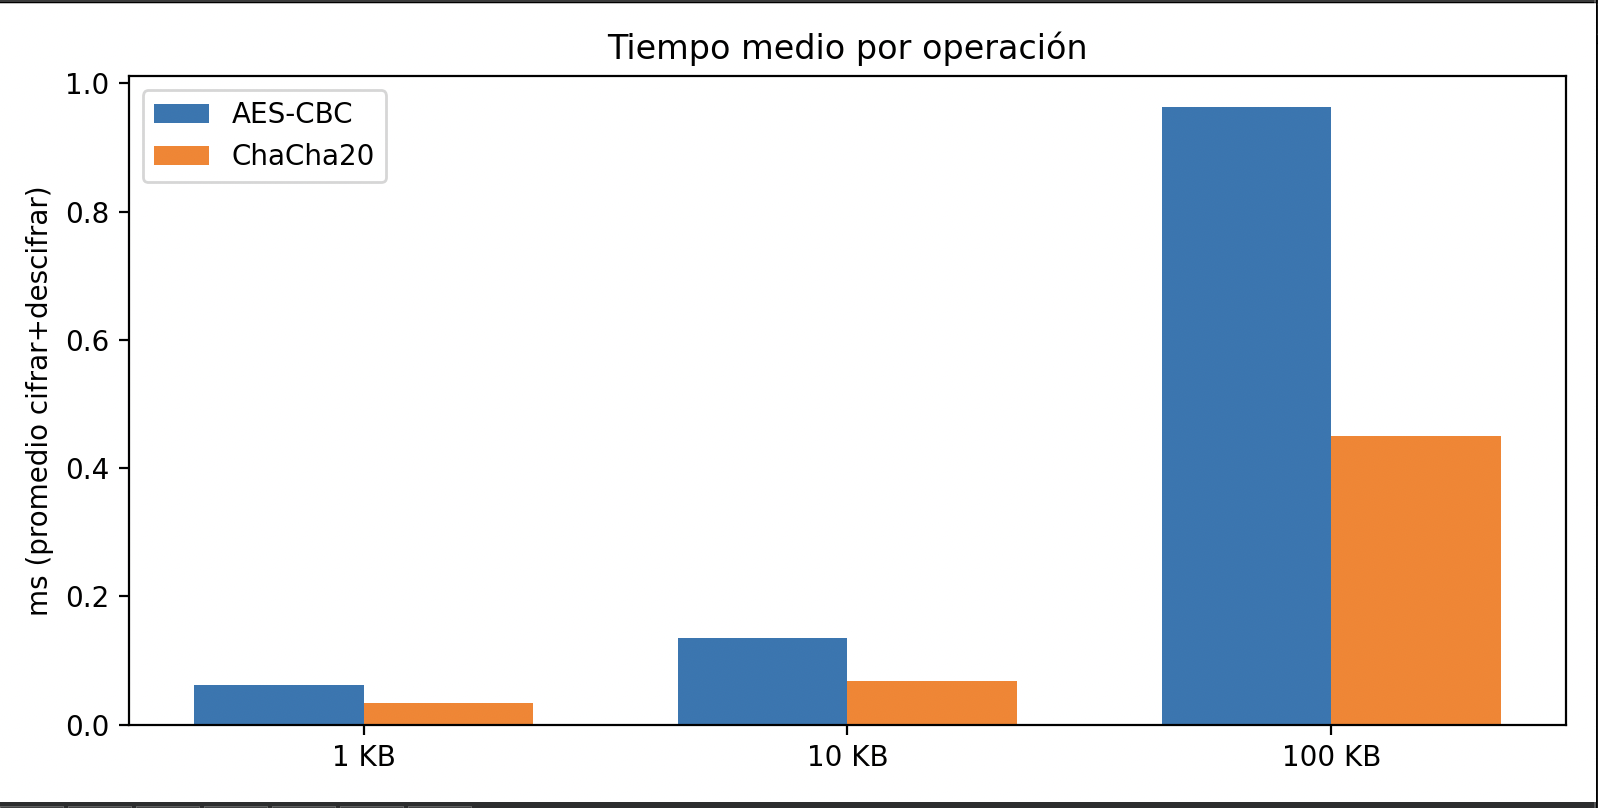


Memoria

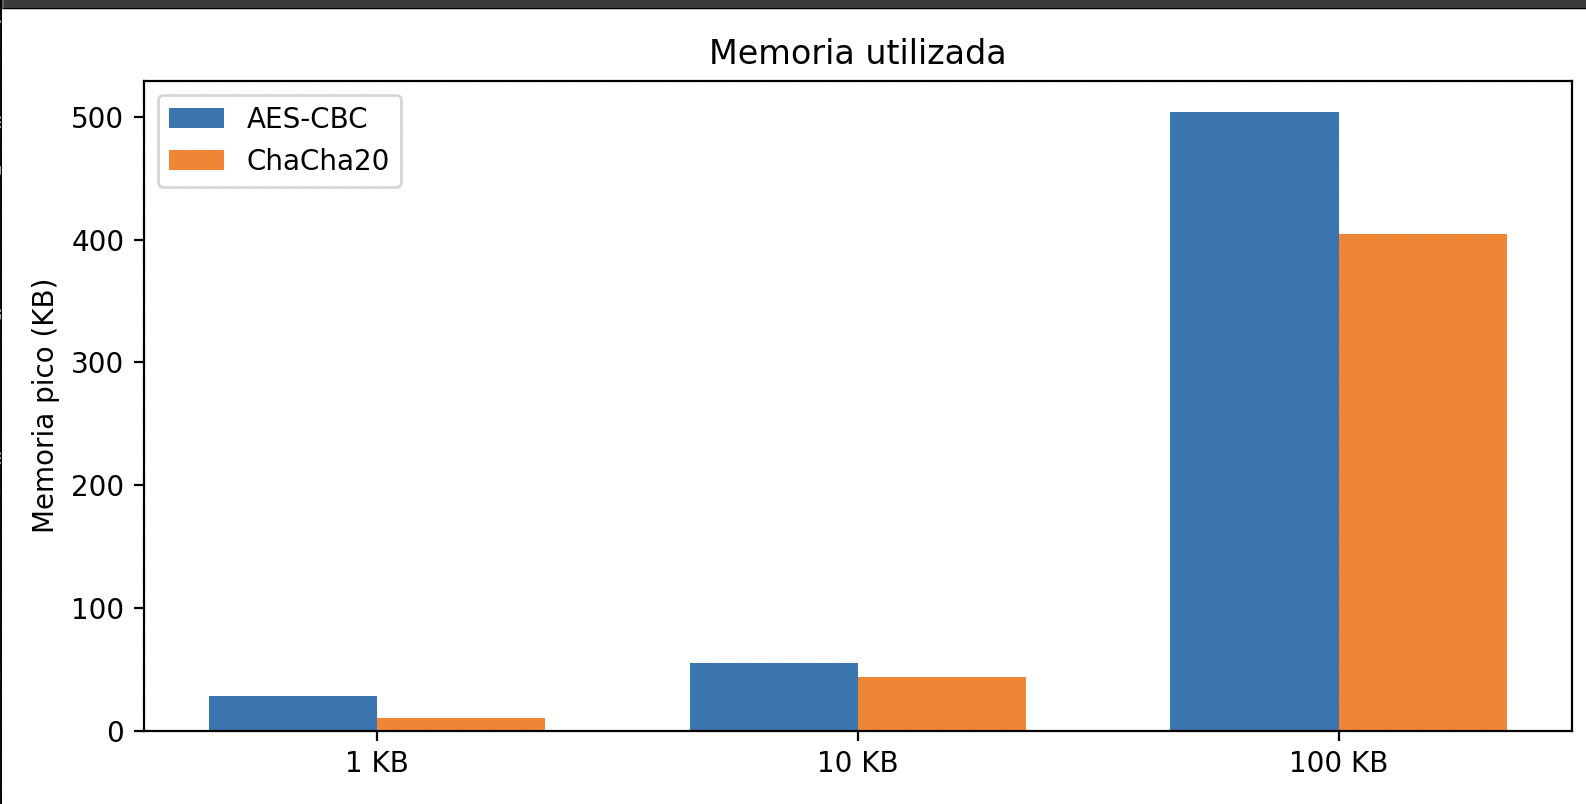

## Comparativa ChaCha20 vs AES-CBC

>  50 iteraciones por tamaño  
> *Claves de 256 bits · AES-CBC con padding PKCS7 · Mismas claves/nonce para todos los ciclos*

| Tamaño | AES-CBC<br>(ms/op) | ChaCha20<br>(ms/op) | Pico RAM AES (KB) | Pico RAM ChaCha (KB) |
|--------|-------------------|---------------------|-------------------|----------------------|
| **1 KB**  | **0.21 ms** | 0.05 ms | 18 KB | **3 KB** |
| **10 KB** | **0.30 ms** | 0.18 ms | 41 KB | **30 KB** |
| **100 KB**| 2.36 ms | **2.06 ms** | 400 KB | **300 KB** |


**¿Cuál es más rápido?**  
  *Para bloques pequeños (≤10 KB) ChaCha20 es 2–4× más veloz.*  
  En archivos grandes la diferencia se reduce, pero ChaCha20 sigue siendo ligeramente mejor en software puro.

**¿Cuándo usar ChaCha20 en vez de AES-CBC?**  
  - **Dispositivos sin AES-NI** (IoT, teléfonos antiguos, microcontroladores).  
  - Protocolos modernos (TLS 1.3, WireGuard) que prefieren ChaCha20-Poly1305 para rendimiento constante y autenticidad integrada.  
  - Entornos donde se valora la resistencia a ataques de canal lateral: ChaCha es *data-independent* (no usa S-boxes ni búsquedas de tabla).

Para sistemas con hardware AES acelerado (AES-NI, ARM-Crypt), AES-GCM sigue siendo una muy buena opción; en software puro ChaCha20 suele ganar en velocidad y simplicidad.


## **Parte 4: Implementando un Cifrado de Flujo con ChaCha20**

(código en archivos de carpeta parte4)